# Common Passwords

## About Dataset

### 10000 Most Common Passwords

If your password is on this list of 10,000 most common passwords, you need a new password. A hacker can use or generate files like this, which may readily be compiled from breaches of sites such as Ashley Madison. Usually, passwords are not tried one-by-one against a system's secure server online; instead, a hacker might manage to gain access to a shadowed password file protected by a one-way encryption algorithm, then test each entry in a file like this to see whether it encrypted form matches what the server has on record. The passwords may then be tried against any account online that can be linked to the first, to test for passwords reused on other sites.

### Acknowledgements
The dataset was procured by SecLists. SecLists is the security tester's companion. It's a collection of multiple types of lists used during security assessments, collected in one place. List types include usernames, passwords, URLs, sensitive data patterns, fuzzing payloads, web shells, and many more. The goal is to enable a security tester to pull this repository onto a new testing box and have access to every type of list that may be needed.



What makes a password secure?
<br>
According to https://www.gvec.net/five-tips-for-creating-a-strong-password/, there are 3 main factors:
<br>
Password length
<br>
Using numbers and capital letters
<br>
Not using obvious words
<br>


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df  = pd.read_csv("common_passwords.csv")

In [47]:
df.head()

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
0,123456,6,0,6,0,0,0,0,1
1,password,8,8,0,0,8,0,2,2
2,12345678,8,0,8,0,0,0,0,1
3,qwerty,6,6,0,0,6,0,1,3
4,123456789,9,0,9,0,0,0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   password       10000 non-null  object
 1   length         10000 non-null  int64 
 2   num_chars      10000 non-null  int64 
 3   num_digits     10000 non-null  int64 
 4   num_upper      10000 non-null  int64 
 5   num_lower      10000 non-null  int64 
 6   num_special    10000 non-null  int64 
 7   num_vowels     10000 non-null  int64 
 8   num_syllables  10000 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 703.2+ KB


In [49]:
df.duplicated().sum()

2

There are 2 duplicate passwords

In [50]:
df[df.duplicated()]

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
484,abcdef,6,6,0,0,6,0,2,1
3507,easy,4,4,0,0,4,0,2,1


Below, we see that there were only 2 passwords that were repeated more than once:  
    - "easy"  
    - "abcdef"  


In [51]:
df.describe()

,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.651300,5.030300,1.617600,0.025300,5.005000,0.003400,1.805900,1.606600
std,1.370947,2.804098,2.971911,0.322909,2.809727,0.119958,1.242409,0.681383
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000
50%,7.000000,6.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000
75%,8.000000,7.000000,1.000000,0.000000,7.000000,0.000000,3.000000,2.000000
max,16.000000,13.000000,12.000000,8.000000,13.000000,6.000000,10.000000,6.000000


What do we note below, from the results of the `describe()` function? 

- There are 10000 datapoints in the dataset
- Of the leaked password:
    - mean length ~= 6.65
    - mean num_chars ~= 5.03
    - mean num_digits ~= 1.62
    - mean num_upper ~= 0.03
    - mean num_lower ~= 5.005
    - mean num_special ~= 0.003
    - mean num_vowels ~= 1.81
    - mean num_syllables ~= 1.61
- minimum password length = 3, an maximum password length = 16

- On Average there are 5 characters, 2 digits, 3 lowercase, 1 vowel in the leaked password
- There are lengthy passwords with upto 16 characters or digits but still got leaked 


In [52]:
df.length.value_counts()

6     3176
8     2971
7     1771
5      903
4      810
9      219
10      94
11      28
12      21
3        3
13       2
15       1
16       1
Name: length, dtype: int64

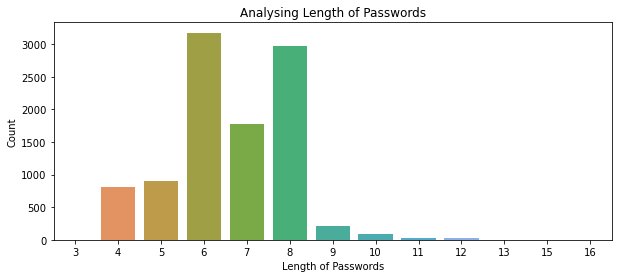

In [53]:
ind_ = df.length.value_counts().values
val_ = df.length.value_counts().index

plt.figure( figsize=(10, 4) )
sns.barplot(x = val_, y = ind_)
plt.xlabel("Length of Passwords")
plt.ylabel("Count")
plt.title("Analysing Length of Passwords")
plt.show()

Majority of the password are of length 6 or 8.

There are passwords that are even of length 3 and large as 13/15/16

In [54]:
# Here, we can see the top 10 longest passwords:

df.sort_values(by='length', ascending=False)[['password', 'length']].head(10)

,password,length
4761,PolniyPizdec0211,16
2201,Mailcreated5240,15
3338,Sojdlg123aljg,13
11,wrongpassword,13
2609,123456qwerty,12
8968,123456789qwe,12
9364,masterbating,12
1239,123qweasdzxc,12
1664,q1w2e3r4t5y6,12
6511,ghjcnjgfhjkm,12


In [55]:
# Let's look at the top 10 shortest passwords:

df.sort_values(by='length', ascending=True)[['password', 'length']].head(10)

,password,length
4349,sex,3
8186,mad,3
1591,123,3
5214,shao,4
718,1980,4
8025,hung,4
6134,beta,4
8020,junk,4
4760,qiao,4
6146,1949,4


In [56]:
# Let's look at the top 10 passwords with the most syllables (as defined by this dataset):

df.sort_values(by='num_syllables', ascending=False)[['password', 'num_syllables']].head(10)

,password,num_syllables
6047,cccccccc,6
5303,llllllll,6
3973,mmmmmmmm,6
5678,hhhhhhhh,6
7058,mmmmmmm,5
3746,fktrcfylhf,5
8152,sonyericsson,5
9911,qwerasdfzxcv,5
4652,rjycnfynby,5
4297,qwertyqwerty,5


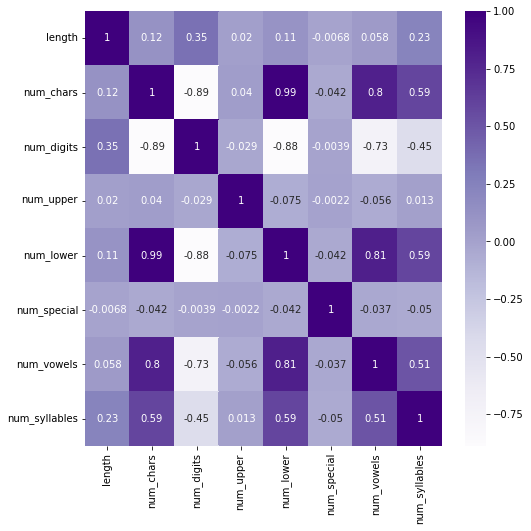

In [79]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Purples')

#### We observe **high positive correlations** between:  
    - num_chars and num_lower (positive correlation)  
    - num_vowels and num_lower (positive correlation)  
    - num_vowels and num_chars (positive correlation)  

#### We also observation **high negative correlations** between:  
    - num_lower and num_digits (negative correlation)  
    - num_vowels and num_digits (negative correlation)  
    - num_chars and num_digits (negative correlation)  

In [58]:
# Most Secure password is considered at least 8 characters long.


secure_passwords = df[df['length'] >=8]
# print(secure_passwords.shape)
print( f"Percentage of Secured Password : {secure_passwords.shape[0] / df['length'].count() * 100}%"  )

insecure_passwords = df[df['length'] <8]
# print(insecure_passwords.shape)
print( f"Percentage of Insecured Password : {insecure_passwords.shape[0] / df['length'].count() * 100}%"  )


Percentage of Secured Password : 33.37%
Percentage of Insecured Password : 66.63%


As we can see, more than 66% of the most popular passwords are not long enough. Now let's check those with symbols, numbers and capital letters.

In [59]:
secure_passwords = secure_passwords[(secure_passwords['num_chars'] > 0) & (secure_passwords['num_digits']>0)
                                    & (secure_passwords['num_upper'] > 0) & (secure_passwords['num_lower']>0)]
secure_passwords.shape

(24, 9)

In [60]:
print( secure_passwords.password )

710          Usuckballz1
1215         Soso123aljg
2201     Mailcreated5240
2664            Passw0rd
2697            8J4yE3Uz
3067           Password1
3162            Turkey50
3328            1Passwor
3338       Sojdlg123aljg
3919            Passwor1
4761    PolniyPizdec0211
4861          7uGd5HIp2J
5202          vSjasnel12
6011            Michael1
6026          Good123654
6939            Kordell1
7341            Misfit99
7348            Letmein1
7501         Password123
7783            Trustno1
7971            Welcome1
8669            5Wr2i7H8
8851            Jordan23
9358            Mustang1
Name: password, dtype: object


As we can see in the DataFrame above, only 0.24% of the most popular password would be secure before checking criteria number 3, which is not using obvious words. We can see that among those passwords, some of them are popular words with added just one integer ( most with "1" at the end, and "Passw0rd" being obvious one to drop, since it is easy to hack). Let's clear these.

In [61]:
secure_passwords = secure_passwords[secure_passwords['num_digits'] > 1]
secure_passwords

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
1215,Soso123aljg,11,8,3,1,7,0,3,1
2201,Mailcreated5240,15,11,4,1,10,0,5,4
2697,8J4yE3Uz,8,5,3,3,2,0,0,1
3162,Turkey50,8,6,2,1,5,0,2,1
3338,Sojdlg123aljg,13,10,3,1,9,0,2,3
4761,PolniyPizdec0211,16,12,4,2,10,0,4,3
4861,7uGd5HIp2J,10,7,3,4,3,0,1,1
5202,vSjasnel12,10,8,2,1,7,0,2,3
6026,Good123654,10,4,6,1,3,0,2,1
7341,Misfit99,8,6,2,1,5,0,2,2


In [62]:

print(f"The number of secure passwords out of 10000 most popular is {len(secure_passwords)}")

The number of secure passwords out of 10000 most popular is 13


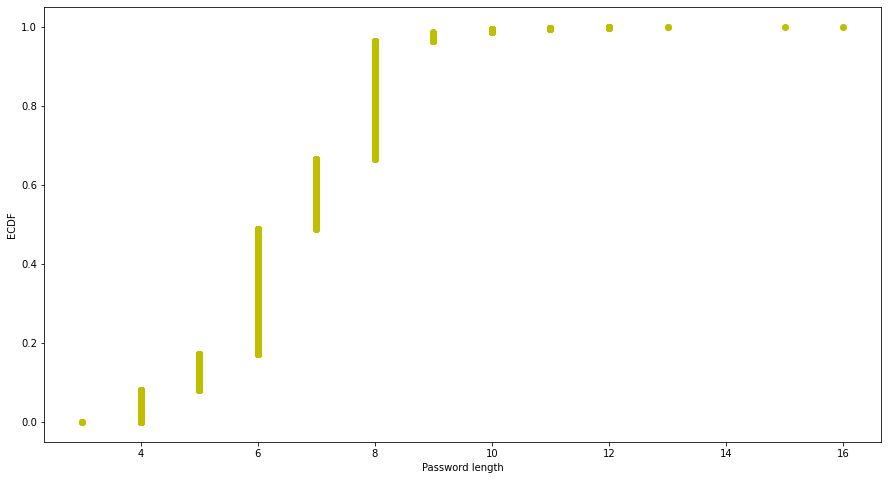

In [63]:
# So, out of 10 000 most popular passwords, only 0.13% would be considered secure. 
# This easily explaines why most people's accounts are easily hacked.
# Now let's check the distribution of password length.

plt.figure(figsize=(15,8))

#Computing ECDF for password length
#n - number of data points
n = len(df['length'])
#x - x-data for ECDF
x = np.sort(df['length'])
#y - y-data for ECDF
y = np.arange(1, n+1) / n
#Generate ECDF plot
plt.scatter(x,y, c = "y")
plt.xlabel('Password length')
plt.ylabel('ECDF')
plt.show()


In [71]:
# Function to check the strength of the password input by the user based on the following features.
#     Length minimum of 8 characters  (+4 Strength)
#     Use of upper case characters (+1 Strength) 
#     Use of lower case characters (+1 Strength)
#     Use of digits (+1 Strength)
#     Use of Special Characters (+3 Strength)
#     Use of Spaces  (Invalid Password)


def passwordCheck(userPass) : 
    import string
    finalstrength = 0

    if any(chr.isspace() for chr in userPass) : 
    #     print("Password not Valid. It contains Blank letter.")
        return "Not Valid"
    else : 
        if len(userPass)>=8:    finalstrength += 4
        if any(chr.isupper() for chr in userPass):    finalstrength += 1
        if any(chr.islower() for chr in userPass):    finalstrength += 1
        if any(chr.isnumeric() for chr in userPass):    finalstrength += 1
        if any(chr for chr in userPass if chr in string.punctuation):    finalstrength += 3
    #     print("finalstrength = ", finalstrength)

        if finalstrength >= 7 :
            return "Excellent"
        elif finalstrength < 7 and finalstrength >= 5:
            return "Average"
        else : 
            return "Poor"


In [74]:
df['Remarks'] = df['password'].apply( passwordCheck )

In [75]:
df.head()

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables,Remarks
0,123456,6,0,6,0,0,0,0,1,Poor
1,password,8,8,0,0,8,0,2,2,Average
2,12345678,8,0,8,0,0,0,0,1,Average
3,qwerty,6,6,0,0,6,0,1,3,Poor
4,123456789,9,0,9,0,0,0,0,1,Average


In [78]:
df.Remarks.value_counts()

Poor         6663
Average      3309
Excellent      28
Name: Remarks, dtype: int64

As shown above, more than 95% of these passwords are shorter than 9 characters.<br>
Conclusion:
Almost all of the most popular passwords are not secure. As long as people keep using easy to break passwords, they will be exposed to being hacked. 